<table style="margin-left: -8px;">
<tr>
    <td style="width: 28%; padding: 4px;">
        <img src=https://idp-static.wilp-connect.net/idp/login_files/img/logo.webp alt="BITS-Pilani" width="300px"/>
    </td>
    <td style="width: 70%; padding-left: 80px;">
        <span style="font-size: xx-large; font-weight: bold;">ML Ops</span><br/><br/>
        <span style="font-size: x-large; font-weight: bold;">Assignment - 1 </span><br/>
        <span style="font-size: large; font-weight: bold;">Group - 57</span>
    </td>
</tr>
</table>
<hr/>

# Problem Statement
**MLOps Experimental Learning Assignment:**  
End-to-End ML Model Development, CI/CD, and Production Deployment Experimental Learning  

**Objective:**  
Design, develop, and deploy a scalable and reproducible machine learning solution utilising modern MLOps best practices. The assignment emphasises practical automation, experiment tracking, CI/CD pipelines, containerization, cloud deployment, and monitoring—mirroring real-world production scenarios.

# Import Libraries/Dataset

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Data Acquisition

## Load Dataset
**Dataset:** Heart Disease UCI Dataset  
**URL:** https://archive.ics.uci.edu/dataset/45/heart+disease

In [ ]:
# From the dataset description
# Column names are as defined in header_cols list
# Categorical features [Columns ->]: sex, cp, fbs, restecg, exang, slope, thal
header_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Load IMDB Dataset as data frame
df = pd.read_csv("../data/processed.cleveland.data", header=None)
df.columns = header_cols

# Sanity Check
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Check shape and size
print(f"Dimention of data: {df.shape}")
print(f"Size of data: {df.size}")

Dimention of data: (303, 14)
Size of data: 4242


# Exploratory Data Analysis

## Identify / Define Target

In [4]:
# From the dataset description
# Target/Label [Column -> ]: num | 2 Classes: 0 = Absence | [1,2,3,4] = Presence
df['is_present'] = np.where(df['num'] == 0, 0, 1)

In [5]:
# Remove num column as it is not required further
df.drop('num', axis=1, inplace=True)

# Sanity Check
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,is_present
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Class Distribution of the Dataset

In [6]:
is_present_counts = df['is_present'].value_counts()
is_present_counts

is_present
0    164
1    139
Name: count, dtype: int64

Index([0, 1], dtype='int64', name='is_present')

--------------------------------------------------


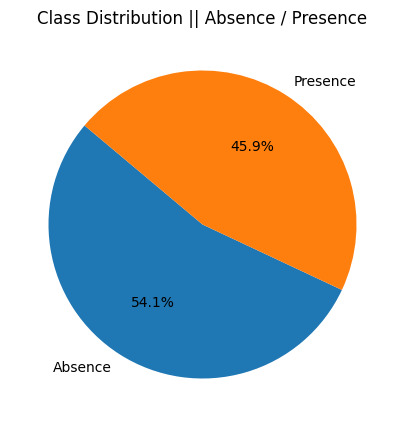

In [7]:
# Class interpretation
print(f"{is_present_counts.index}\n")
print("-"*50)
# 0 = "Absence" 
# 1 = "Presence"
# Class distribution
plt.figure(figsize=(5,5))
plt.pie(is_present_counts, labels=['Absence', 'Presence'], autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution || Absence / Presence')
plt.show()

## Find Duplicate Records

In [8]:
# Find overall duplicate records in the data frame
duplicates = df[df.duplicated(keep='first')]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,is_present


No duplicates found in the data frame. Maintain only a single instance of duplicate if found.

## Validate and Clean

In [9]:
# Check information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    float64
 1   sex         303 non-null    float64
 2   cp          303 non-null    float64
 3   trestbps    303 non-null    float64
 4   chol        303 non-null    float64
 5   fbs         303 non-null    float64
 6   restecg     303 non-null    float64
 7   thalach     303 non-null    float64
 8   exang       303 non-null    float64
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    float64
 11  ca          303 non-null    object 
 12  thal        303 non-null    object 
 13  is_present  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
# Check NaN count
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
is_present    0
dtype: int64

In [11]:
# List Unique values for categorical features
for col in categorical_cols:
    print(f"Column: {col} | Unique Value: {df[col].unique()}")

Column: sex | Unique Value: [1. 0.]
Column: cp | Unique Value: [1. 4. 3. 2.]
Column: fbs | Unique Value: [1. 0.]
Column: restecg | Unique Value: [2. 0. 1.]
Column: exang | Unique Value: [0. 1.]
Column: slope | Unique Value: [3. 2. 1.]
Column: ca | Unique Value: ['0.0' '3.0' '2.0' '1.0' '?']
Column: thal | Unique Value: ['6.0' '3.0' '7.0' '?']


## Imputation

In [12]:
# Identify object type columns to check such unknown value '?' and mode imputation
cols_with_q = df.select_dtypes(include='object').columns
for col in cols_with_q:
    print(f"Column: {col}\n{'-'*20}")
    print(f"Unique Value: {df[col].unique()} | Records with Unknown Value: {(df[col] == '?').sum()}")
    df[col] = df[col].replace('?', df[col].replace('?', pd.NA).mode()[0])
    print(f"Unique Value after Imputation: {df[col].unique()}\n")

Column: ca
--------------------
Unique Value: ['0.0' '3.0' '2.0' '1.0' '?'] | Records with Unknown Value: 4
Unique Value after Imputation: ['0.0' '3.0' '2.0' '1.0']

Column: thal
--------------------
Unique Value: ['6.0' '3.0' '7.0' '?'] | Records with Unknown Value: 2
Unique Value after Imputation: ['6.0' '3.0' '7.0']



## Detect and Clip Outliers

In [13]:
def detect_and_clip_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"Column: {col}\n{'-'*20}")
    print(f"No of outliers: {len(outliers)}\n")
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# All numeric columns
numeric_cols = list(set(header_cols) - set(categorical_cols) - set(['num'])) # Exclude the target label as well

# Clipped all the outlier with corresponding lower and upper bound
for col in numeric_cols:
    df = detect_and_clip_outliers_iqr(df, col)

Column: oldpeak
--------------------
No of outliers: 5

Column: trestbps
--------------------
No of outliers: 9

Column: age
--------------------
No of outliers: 0

Column: thalach
--------------------
No of outliers: 1

Column: chol
--------------------
No of outliers: 5



## Encoding
Since there are multiple categorical features, we will perform **one-hot enconding** for each of those columns

In [14]:
# Map 1.0 = Male | 0.0 = Female
df['sex'] = df['sex'].map({1.0: 'male', 0.0: 'female'})

# One-hot encoding for categorical attributes
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

# Move target column at the end
target = df.pop('is_present')
df['is_present'] = target

In [15]:
# Sanity Check
df.head(5)

,age,trestbps,chol,thalach,oldpeak,sex_female,sex_male,cp_1.0,cp_2.0,cp_3.0,...,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,is_present
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,1,1,0,0,0,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [16]:
# Describe the data
df.describe()

,age,trestbps,chol,thalach,oldpeak,sex_female,sex_male,cp_1.0,cp_2.0,cp_3.0,...,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,is_present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.346535,245.584158,149.652640,1.024422,0.320132,0.679868,0.075908,0.165017,0.283828,...,0.462046,0.069307,0.594059,0.214521,0.125413,0.066007,0.554455,0.059406,0.386139,0.458746
std,9.038662,16.648749,47.558803,22.731735,1.110127,0.467299,0.467299,0.265288,0.371809,0.451600,...,0.499382,0.254395,0.491886,0.411169,0.331734,0.248704,0.497848,0.236774,0.487668,0.499120
min,29.000000,94.000000,126.000000,84.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,170.000000,371.000000,202.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering

## Correlation Analysis

In [17]:
# Excluding the columns with text value for correlation analysis without disturbing the existing dataframe (df)
df_numeric_features = df.drop(columns=['is_present'])

In [18]:
# Correlation matrix of extracted features 
corr_matrix = df_numeric_features.corr()
corr_matrix

,age,trestbps,chol,thalach,oldpeak,sex_female,sex_male,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
age,1.000000,0.292061,0.200896,-0.393504,0.206829,0.097542,-0.097542,0.045438,-0.151684,-0.051714,...,-0.184938,0.170596,0.028487,-0.379842,0.175941,0.224533,0.160884,-0.132264,0.062042,0.104902
trestbps,0.292061,1.000000,0.141127,-0.052293,0.176209,0.055920,-0.055920,0.158211,-0.090577,-0.045275,...,-0.082051,0.029267,0.103764,-0.042608,-0.064588,0.076641,0.088822,-0.134318,0.084640,0.096027
chol,0.200896,0.141127,1.000000,-0.012357,0.049307,0.183610,-0.183610,-0.051029,-0.007529,-0.058314,...,-0.005426,0.028612,-0.045505,-0.110285,0.020156,0.062713,0.101150,0.009351,-0.098366,0.038213
thalach,-0.393504,-0.052293,-0.012357,1.000000,-0.350351,0.047598,-0.047598,0.079612,0.250098,0.159625,...,0.447725,-0.419053,-0.057091,0.292963,-0.197126,-0.057435,-0.176913,0.289405,-0.161031,-0.217262
oldpeak,0.206829,0.176209,0.049307,-0.350351,1.000000,-0.111505,0.111505,0.092627,-0.284160,-0.123514,...,-0.521960,0.336759,0.364495,-0.238290,-0.004987,0.233526,0.168044,-0.346317,0.107840,0.301187
sex_female,0.097542,0.055920,0.183610,0.047598,-0.111505,1.000000,-1.000000,-0.089828,0.037990,0.117189,...,0.021849,0.002576,-0.047986,0.106260,-0.100103,0.017836,-0.068455,0.387396,-0.142524,-0.326284
sex_male,-0.097542,-0.055920,-0.183610,-0.047598,0.111505,-1.000000,1.000000,0.089828,-0.037990,-0.117189,...,-0.021849,-0.002576,0.047986,-0.106260,0.100103,-0.017836,0.068455,-0.387396,0.142524,0.326284
cp_1.0,0.045438,0.158211,-0.051029,0.079612,0.092627,-0.089828,0.089828,1.000000,-0.127412,-0.180428,...,-0.044421,0.009321,0.068981,0.059293,-0.058710,0.041972,-0.076192,0.006206,0.033404,-0.022554
cp_2.0,-0.151684,-0.090577,-0.007529,0.250098,-0.284160,0.037990,-0.037990,-0.127412,1.000000,-0.279862,...,0.223921,-0.197994,-0.051298,0.150221,-0.059046,-0.087804,-0.082372,0.201734,-0.036496,-0.188225
cp_3.0,-0.051714,-0.045275,-0.058314,0.159625,-0.123514,0.117189,-0.117189,-0.180428,-0.279862,1.000000,...,0.112900,-0.098902,-0.027681,0.117923,0.027661,-0.194184,-0.019946,0.210857,-0.096275,-0.168515


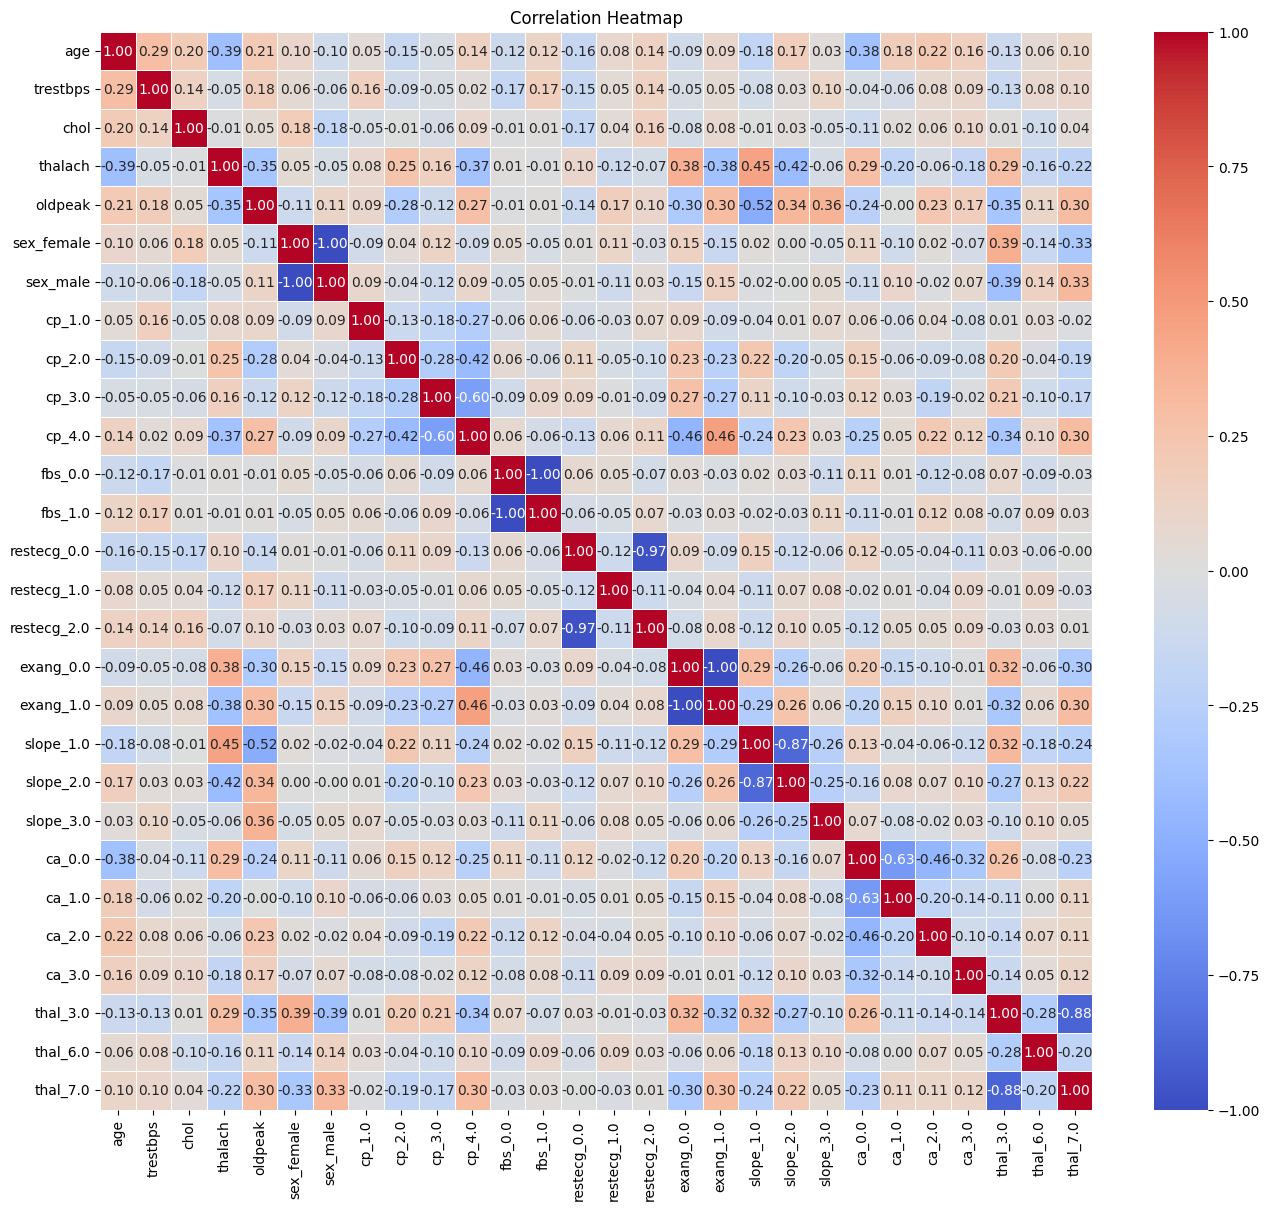

In [19]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Set a correlation threshold
threshold = 0.75

# Find highly correlated features
high_corr = np.where((corr_matrix > threshold) & (corr_matrix < 1.0))

# Display highly correlated feature pairs
high_corr_features = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr)]
print(f"Highly Correlated Features: {high_corr_features}")

Highly Correlated Features: []


## Visual Inspection of Features

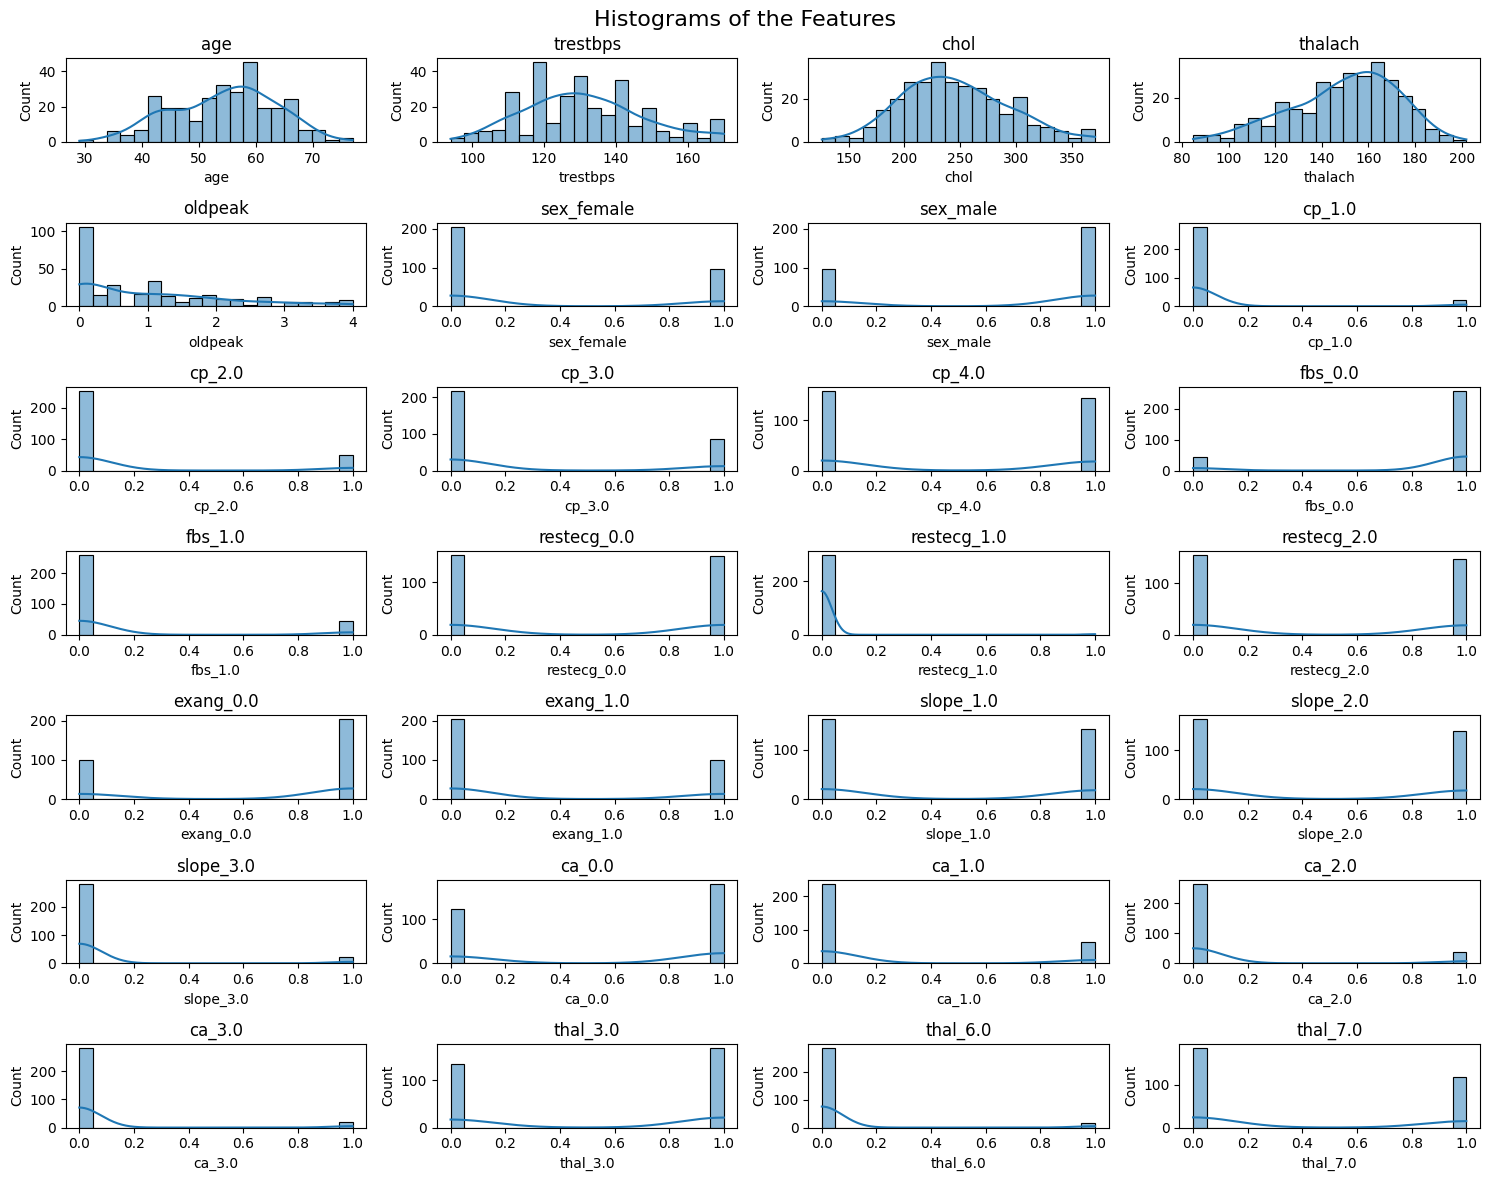

In [21]:
# Create subplots (4 rows, 4 columns) - Extra subplot will be empty
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 12))  # 4x4 grid
fig.suptitle("Histograms of the Features", fontsize=16)
axes = axes.flatten()

# Plot histograms for each feature
for i, col in enumerate(df_numeric_features.columns):
    sns.histplot(df_numeric_features[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplot
for j in range(len(df_numeric_features.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
# Original features without scaling and PCA(all columns except the last one)
X_original = df.iloc[:, :-1]
# y = output (last column)
y = df.iloc[:, -1]

# Split data into training and testing sets
# Testing size = 20 %
# Training size = 100-20 = 80 %
# stratify parameter ensures that observations from each class is are given equal weightage
(X_train_original, X_test_original, y_train, y_test) = train_test_split(X_original, y, stratify=y, test_size= 0.2)
print(f"Traning data to be used: {X_train_original.shape}")
print(f"Test data to be used: {X_test_original.shape}")

Traning data to be used: (242, 28)
Test data to be used: (61, 28)


## Standardization

In [23]:
# Standard Scaler - Numeric columns
scaler = StandardScaler()
print(f"Columns standardized: {numeric_cols}")

X_train_num_scale = scaler.fit_transform(X_train_original[numeric_cols])
X_test_num_scale = scaler.transform(X_test_original[numeric_cols])

# Combine scaled numeric columns with categorical columns
X_train_scaled = np.hstack((X_train_num_scale, X_train_original.drop(columns=numeric_cols).values))
X_test_scaled = np.hstack((X_test_num_scale, X_test_original.drop(columns=numeric_cols).values))

Columns standardized: ['oldpeak', 'trestbps', 'age', 'thalach', 'chol']


## Dimentionality Reduction - PCA

In [25]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)
print(f"PCA Transformation Summary")
print(f"Original Training Set: {X_train_scaled.shape[1]} features → {X_train_transformed.shape[1]} PCs")
print(f"Original Test Set: {X_test_scaled.shape[1]} features → {X_test_transformed.shape[1]} PCs")
print(f"Variance explained: {pca.explained_variance_ratio_.sum():.2%}")

PCA Transformation Summary
Original Training Set: 28 features → 14 PCs
Original Test Set: 28 features → 14 PCs
Variance explained: 95.26%


# Model Development

## Model Training

### Logistic Regression 
**Model Initialization & Hyperparameter Tuning**  
Find best combination of Hyperparameters

In [26]:
# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 20, 50],
    'solver': ['liblinear', 'saga']
}

# Initialize model
logistic_model = LogisticRegression(max_iter=200)
# Grid Search
grid_search_lt = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_lt.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,LogisticRegre...(max_iter=200)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [27]:
# Get the best logistic reg model
best_logistic_model = grid_search_lt.best_estimator_
print("Logistic Regression - Best Parameters:", grid_search_lt.best_params_)
print("Logistic Regression - Best Score:", grid_search_lt.best_score_)

Logistic Regression - Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression - Best Score: 0.8676020408163266


In [28]:
# predict values for the training data
y_train_pred_lt  = best_logistic_model.predict(X_train_transformed)
# predict values for the test data
y_test_pred_lt  = best_logistic_model.predict(X_test_transformed)

### Random Forest  
**Model Initialization & Hyperparameter Tuning**  
Find best combination of Hyperparameters

In [29]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
# Grid search
grid_search_rf = GridSearchCV(
    rf_model, param_grid, 
    cv=5,  # 5-fold CV
    scoring='accuracy',
    n_jobs=-1,  # Parallel
    verbose=1
)
    
grid_search_rf.fit(X_train_original, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [30]:
# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Best Score:", grid_search_rf.best_score_)

Random Forest - Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest - Best Score: 0.8467687074829933


In [31]:
# predict values for the training data
y_train_pred_rf  = best_rf_model.predict(X_train_original)
# predict values for the test data
y_test_pred_rf  = best_rf_model.predict(X_test_original)

## Performance Evaluation

### Logistic Regression

**Accuracy**

In [32]:
print(f"Logistic Regression - Cross validation - 5 - fold: {cross_val_score(best_logistic_model, X_train_transformed, y_train, cv=5, scoring='accuracy')}")

Logistic Regression - Cross validation - 5 - fold: [0.91836735 0.85714286 0.89583333 0.89583333 0.77083333]


In [33]:
# Find accuracy
print(f"Logistic Regression - Training Accuracy: {accuracy_score(y_train, y_train_pred_lt)}")
print(f"Logistic Regression - Test Accuracy: {accuracy_score(y_test, y_test_pred_lt)}")

Logistic Regression - Training Accuracy: 0.8760330578512396
Logistic Regression - Test Accuracy: 0.819672131147541


**Precision, Recall, F1-Score**

In [34]:
print('Logistic Regression - Classification Report:', end='\n\n')
print(classification_report(y_test, y_test_pred_lt))

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.81      0.79      0.80        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



**ROC-AUC Score**

In [35]:
print("Logistic Regression - ROC AUC Score:", roc_auc_score(y_test, y_test_pred_lt))

Logistic Regression - ROC AUC Score: 0.8170995670995671


### Random Forest

**Accuracy**

In [36]:
print(f"Random Forest - Cross validation - 5 - fold: {cross_val_score(best_rf_model, X_train_original, y_train, cv=5, scoring='accuracy')}")

Random Forest - Cross validation - 5 - fold: [0.89795918 0.87755102 0.85416667 0.89583333 0.70833333]


In [37]:
# Find accuracy
print(f"Random Forest - Training Accuracy: {accuracy_score(y_train, y_train_pred_rf)}")
print(f"Random Forest - Test Accuracy: {accuracy_score(y_test, y_test_pred_rf)}")

Random Forest - Training Accuracy: 0.9214876033057852
Random Forest - Test Accuracy: 0.8524590163934426


**Precision, Recall, F1-Score**

In [38]:
print('Random Forest - Classification Report:', end='\n\n')
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.88      0.79      0.83        28

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**ROC-AUC Score**

In [39]:
print("Random Forest - ROC AUC Score:", roc_auc_score(y_test, y_test_pred_rf))

Random Forest - ROC AUC Score: 0.8474025974025973


### Model Comparison

**Confusion Matrix**

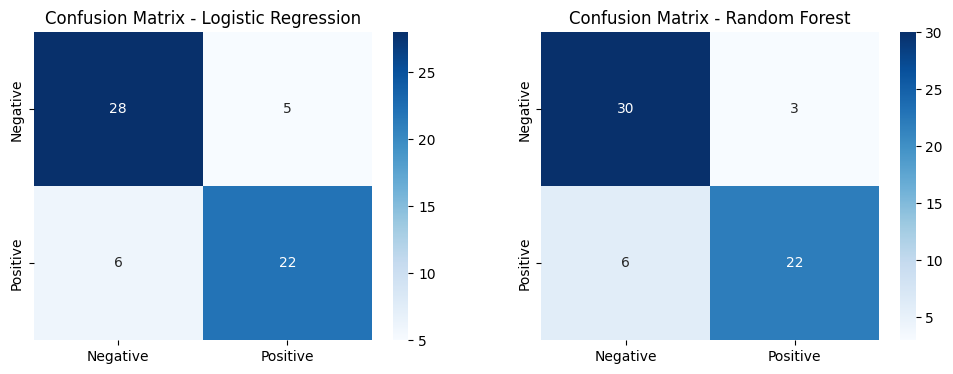

In [40]:
cnf_model_dict = {
    "Logistic Regression": confusion_matrix(y_test, y_test_pred_lt),
    "Random Forest": confusion_matrix(y_test, y_test_pred_rf)
}

plt.figure(figsize=(12, 4))
for i, (name, cnf) in enumerate(cnf_model_dict.items()):
    plt.subplot(1, 2, i+1)
    sns.heatmap(cnf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix - {name}")

plt.show()